In [2]:
import numpy as np
from random import *
from numpy.random import *
import matplotlib.pyplot as plt


Evaluate
$$
I = \int_0^2 \sin^2 \left[\frac{1}{x(2-x)}\right]\text{d} x
$$
using Monte Carlo integration. The key principle here is noting that the function is bounded on $0 < x < 2$, and $0 \leq y \leq 1$, so $I < 2$. We select arbitrary points 
on this rectangle and check whether that point falls on the area under the curve of the integrand.

In [3]:
def integrand(x):
    return (np.sin(1/(x*(2-x))))**2

N = 10000000
X = np.random.uniform(0, 2, size=N)
Y = np.random.uniform(0,1,size = N)
yvals = integrand(X)
counts = np.sum(Y < yvals)

result = (counts/N)*2
print(result)


1.451601


In [4]:
array=[]
for i in range(10000):
    a= np.random.uniform(0,10,100)
    b= np.random.uniform(5,15,100)
    array.append(sum(a<b))

Using the mean value method,
$$ I = (b-a)\langle f \rangle $$
since:
$$
\langle f \rangle = \frac{1}{b-a}\int_a^b f(x) \text{d} x = \frac{I}{b-a}
$$
Numerically, 
$$
I \approx \frac{b-a}{N}\sum_{i=1}^N f(x_i)
$$
It can be mathematically shown that this approach always does better or at least no worse than the "hit-or-miss" approach we did earlier.

In [5]:
N = 10000000
X = np.random.uniform(0, 2, size=N) 
yvals = integrand(X)
2*np.mean(yvals)

1.4515896696832853

For $n$ dimensions,
$$
I \approx \frac{V}{N}\sum_{i=1}^N f(x_{i1}, x_{i2}, \dots, x_{in})
$$

The volume of the unit sphere in n-dimensions is
$$
I = \int_{-1}^1 f(x_1, x_2, \dots, x_n)\text{d}V
$$
where
$$
f(x_1,x_2,\dots, x_n) = 
\begin{cases}
1 \qquad \sum_{i=1}^n x_i^2 \leq 1 \\ 
0 \qquad \text{otherwise}
\end{cases}
$$
Therefore, using Monte Carlo integration (mean value method), 
$$
I \approx \frac{2^n}{N}\sum_{i=1}^N f(x_{i1}, x_{i2}, \dots, x_{in})
$$
since the volume of the enclosing cube in $n$ dimensions is $2^n$

Text(0.5, 1.0, 'Volume of Unit Hypersphere')

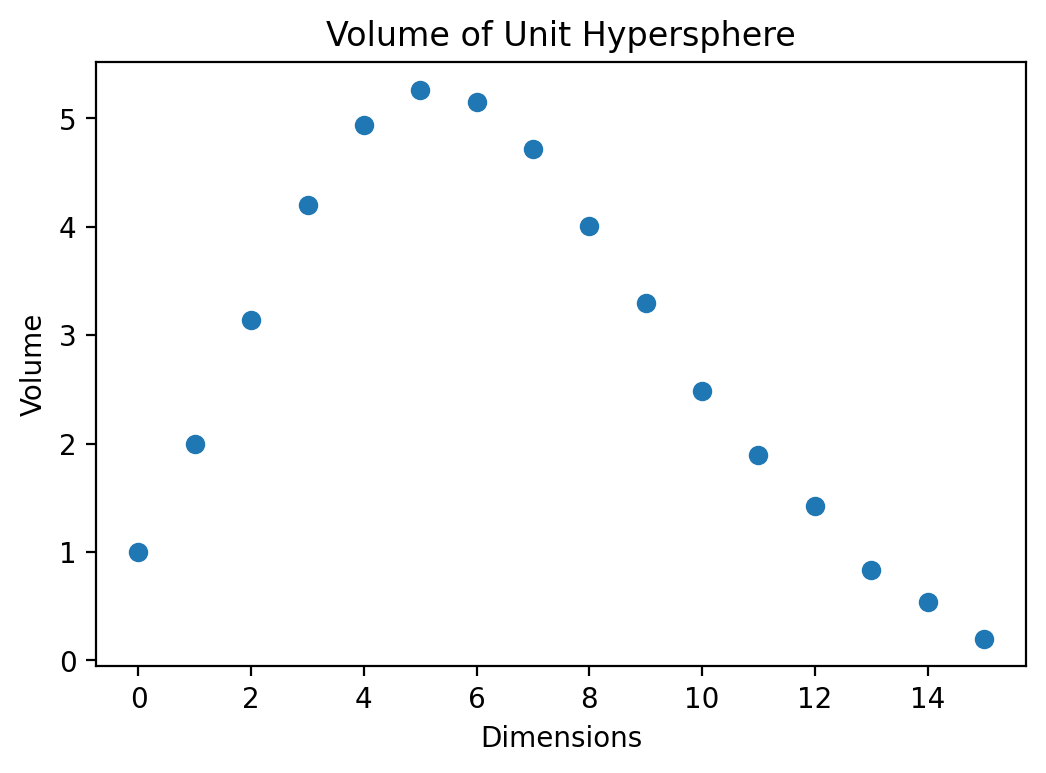

In [30]:
def sum_squares(x):
    return np.sum(x**2)

max_dim = int(15)
arr_dim = [i for i in range(max_dim+1)]
vol = []
N = 1000000
for dimensions in arr_dim:
    points = np.random.uniform(-1,1, size = dimensions*N).reshape((N,dimensions))
    vals = np.sum(points**2, axis=1)
    count = np.sum(vals<=1)
    result = (2**dimensions)*(count/N)
    vol.append(result)
plt.figure(dpi=200)
plt.scatter(arr_dim,vol)
plt.xlabel("Dimensions")
plt.ylabel("Volume")
plt.title("Volume of Unit Hypersphere")


## Importance Sampling
Using the concept of weighted mean to avoid divergences in our integral calculations,
$$
I \approx \frac{1}{N}\sum_{i=1}^N \frac{f(x_i)}{w(x_i)} \int_a^b w(x_i)\text{d}x
$$
where $w$ is the weight function, and the sample points drawn from the distribution:
$$
p(x) = \frac{w(x)}{\int_a^b w(x)\text{d}x}
$$
The distribution $p(x)$ can be obtained from a uniform distribution by solving for $F(x)$ in the transformation equation
$$
\int_{-\infty}^{F(x)} p(x')\text{d} x' = z
$$

# Exercise 10.8: 
Calculate
$$
I = \int_0^1 \frac{x^{-1/2}}{e^x + 1}\text{d}x
$$
using the weight function $w(x) = x^{-1/2}$. Here, it is easy to show that:
$$
p(x) = \frac{1}{2\sqrt{x}}
$$
and
$$
F(x) = z^2
$$
i.e., we square the uniform dist to get our obtained distribution. 

In [34]:
N = 1000000
points = (np.random.uniform(size=N))**2
vals = 1/(np.exp(points)+1)
result = (2/N)*np.sum(vals)
result

0.8388754260460718